In [2]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [3]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=['_April27_16_36_32_.csv']
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_April04_17_16_55_.csv', '_April06_13_56_06_.csv', '_April10_13_36_44_.csv', '_April16_16_41_25_.csv', '_April23_14_41_54_.csv', '_April24_19_14_20_.csv', '_April25_13_41_37_.csv', '_April26_10_09_42_.csv', '_April27_16_36_32_.csv', '_March21_10_50_01_.csv', '_March29_18_58_37_.csv', '_May06_20_45_05_.csv', '_May11_14_39_59_.csv', '_May17_12_08_49_.csv', '_May20_14_13_00_.csv', '_May24_19_03_47_.csv', '_May24_19_06_07_.csv', '_May24_19_06_25_.csv', '_May24_19_07_16_.csv', '_May24_19_08_38_.csv']
['_April27_16_36_32_.csv']


# Box plot

In [4]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)



./logs/modeldata\_April27_16_36_32_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        75.863847  0.741514   0.832845              5000  active learning   
1        83.238783  0.834639   0.876600              5500  active learning   
2        83.960805  0.898172   0.841762              6000  active learning   
3        84.992264  0.841601   0.898699              6500  active learning   
4        86.591026  0.877285   0.894410              7000  active learning   
..             ...       ...        ...               ...              ...   
495      87.261475  0.892950   0.892174              7500  active learning   
496      88.550799  0.909487   0.898538              8000  active learning   
497      87.777205  0.883377   0.907871              8500  active learning   
498      88.396080  0.876414   0.923853              9000  active learning   
499      88.808664  0.885117   0.922868              9500  active learning   

           method  seed

# Influence model architecture

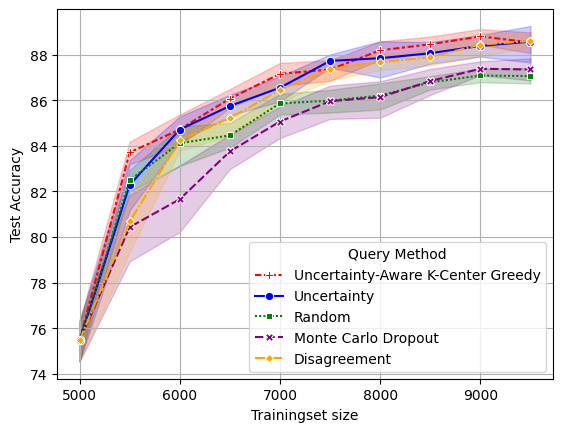

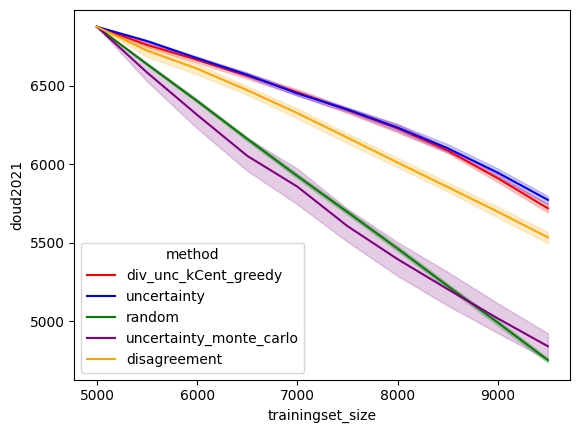

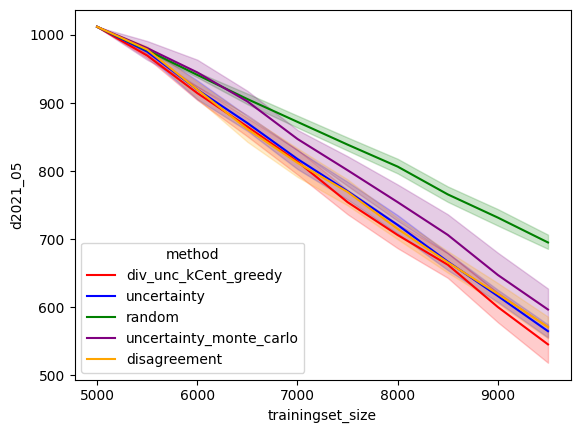

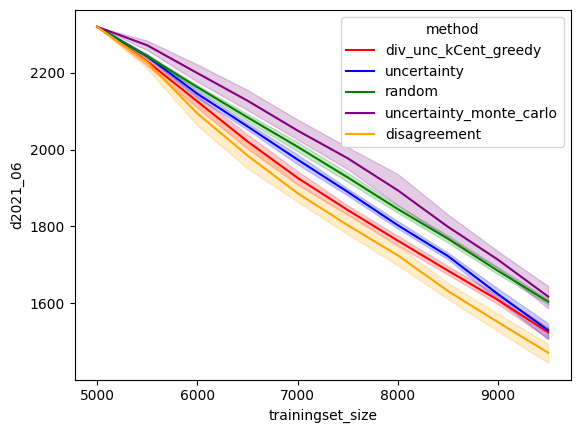

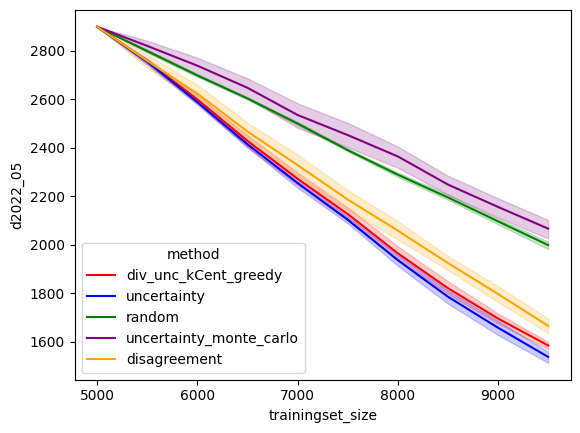

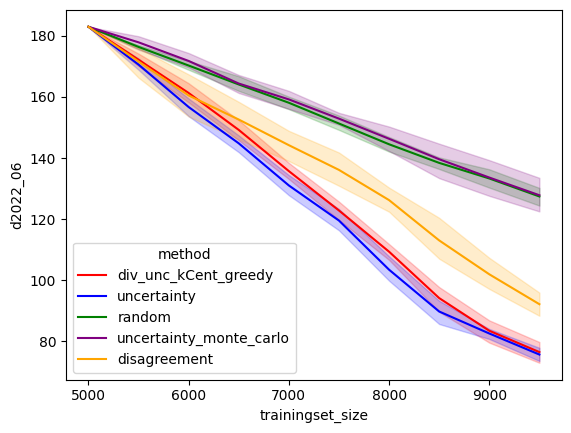

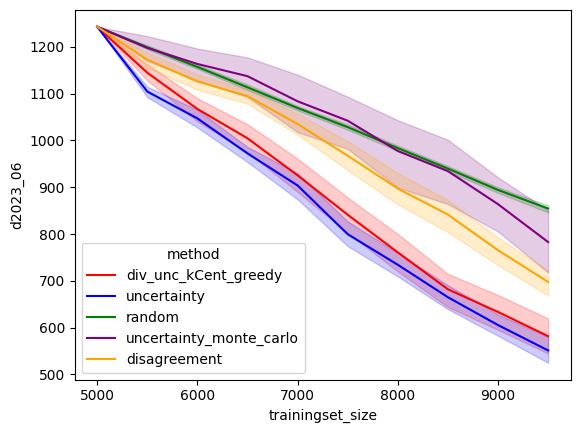

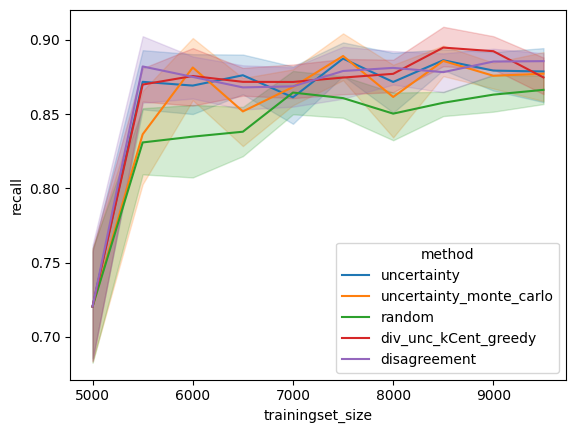

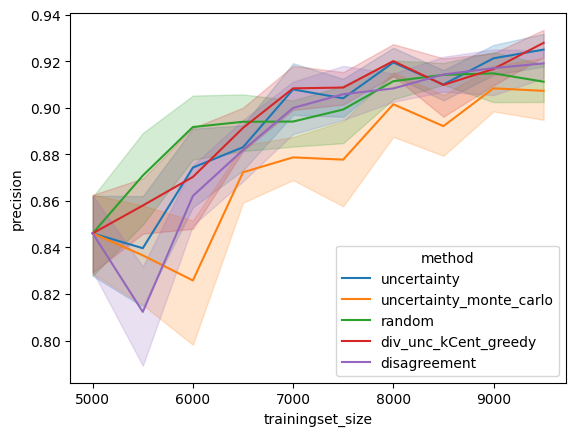

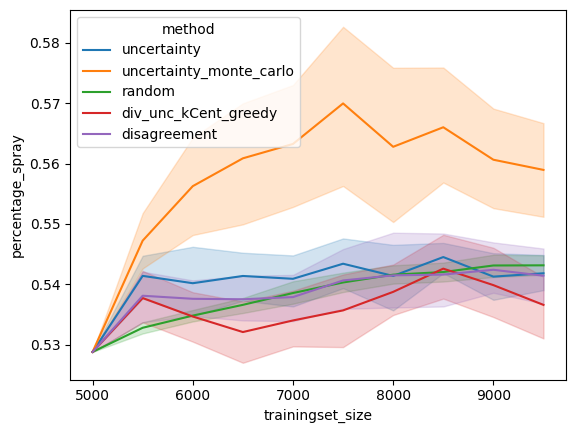

In [5]:
[ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed',"percentage_spray","doud2021",
                   "d2021_05","d2021_06","d2022_05","d2022_06","d2023_06","moud2021","m2021_05","m2021_06","m2022_05"
                   ,"m2022_06","m2023_06"]
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

palette = {
    'div_unc_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}
linesyles = {
    'div_unc_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}
desired_order = [
    'div_unc_kCent_greedy',   
    'uncertainty',
    'random',
   'uncertainty_monte_carlo',
   'disagreement',
   
]

fig=sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method",palette=palette,style='method',markers=True,hue_order=desired_order)
handles, labels = fig.get_legend_handles_labels()


value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',   
    'uncertainty': 'Uncertainty',
    'random': 'Random',
   'uncertainty_monte_carlo': 'Monte Carlo Dropout',
   'disagreement': 'Disagreement'
}


new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('Test Accuracy')
plt.grid(True) 
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="doud2021", hue="method",palette=palette,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2021_05", hue="method",palette=palette,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2021_06", hue="method",palette=palette,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2022_05", hue="method",palette=palette,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2022_06", hue="method",palette=palette,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="d2023_06", hue="method",palette=palette,hue_order=desired_order)
plt.show()
"""
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()
"""
#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

In [13]:
from scipy import stats
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']


df_filtered = df[df['trainingset_size'] == 9500]

summary_stats = df_filtered.groupby('method').agg(
    mean_accuracy=('test accuracy', 'mean'),
    std_accuracy=('test accuracy', 'std'),
    count=('test accuracy', 'count')
).reset_index()

summary_stats['confidence_interval'] = summary_stats.apply(
    lambda row: stats.t.ppf(1 - (1 - 0.95) / 2, df=row['count'] - 1) * row['std_accuracy'] / np.sqrt(row['count']), axis=1
)

summary_stats['lower_bound'] = summary_stats['mean_accuracy'] - summary_stats['confidence_interval']
summary_stats['upper_bound'] = summary_stats['mean_accuracy'] + summary_stats['confidence_interval']

value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',
    'uncertainty': 'Uncertainty',
    'random': 'Random',
    'uncertainty_monte_carlo': 'Monte Carlo Dropout',
    'disagreement': 'Disagreement'
}

summary_stats['method'] = summary_stats['method'].replace(value_replacements)

summary_stats_sorted = summary_stats.sort_values(by='mean_accuracy', ascending=False)


summary_stats_sorted['accuracy_with_error'] = summary_stats_sorted.apply(
    lambda row: f"{row['mean_accuracy']:.2f} $\\pm$ {(row['confidence_interval']):.2f}", axis=1
)


latex_df_final_sorted = summary_stats_sorted[['method', 'accuracy_with_error']]


latex_table_final_sorted = latex_df_final_sorted.to_latex(index=False, header=['Query Method', 'Accuracy at 5000'], escape=False)
print(latex_table_final_sorted)


\begin{tabular}{ll}
\toprule
Query Method & Accuracy at 5000 \\
\midrule
Disagreement & 88.59 $\pm$ 0.36 \\
Uncertainty & 88.57 $\pm$ 0.97 \\
Uncertainty-Aware K-Center Greedy & 88.53 $\pm$ 0.54 \\
Monte Carlo Dropout & 87.34 $\pm$ 0.62 \\
Random & 87.06 $\pm$ 0.41 \\
\bottomrule
\end{tabular}



In [14]:
def calculate_f1_scores(row):
    precision_A = row['precision']
    recall_A = row['recall']
    class_ratio_A = 0.59
    N_A = class_ratio_A
    N_B = 1 - class_ratio_A
    TP_A = recall_A * N_A
    FN_A = N_A - TP_A
    FP_A = (TP_A / precision_A) - TP_A
    TN_A = N_B - FP_A
    precision_B = TN_A / (TN_A + FN_A)
    recall_B = TN_A / (TN_A + FP_A)
    f1_A = 2 * (precision_A * recall_A) / (precision_A + recall_A)
    f1_B = 2 * (precision_B * recall_B) / (precision_B + recall_B)
    return pd.Series({'f1_A': f1_A, 'f1_B': f1_B})

df[['f1_spray', "f1_don't"]] = df.apply(calculate_f1_scores, axis=1)

# Influence preprocessing

## Masking vs pixel remapping

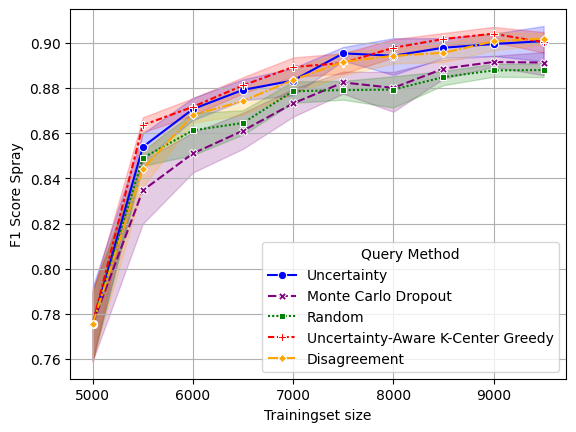

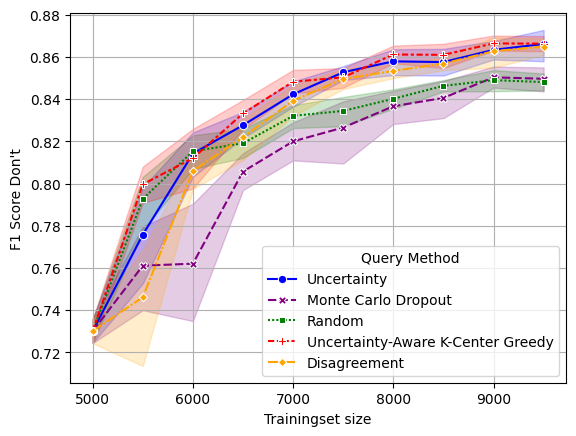

In [10]:
fig=sns.lineplot(data=df, x="trainingset_size", y="f1_spray", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('F1 Score Spray')
plt.grid(True) 
plt.show()
fig=sns.lineplot(data=df, x="trainingset_size", y="f1_don't", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel("F1 Score Don't")
plt.grid(True) 
plt.show()

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution